## Final Project Submission

Please fill out:
* Student name: Martin Ngugi
* Student pace: full time
* Scheduled project review date/time: 09/07/2023
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Introduction
Real estate is one of the most important sectors of any economy. Understanding the key drivers of housing prices can provide valuable insights for both buyers and sellers in the market. In this project, we analyze a data set of house sales in a northwestern county to identify the factors that influence housing prices in the area.

## Business Understanding
The real estate agency helps homeowners buy or sell homes. One of the key services they provide is advice to homeowners about how home renovations can increase the estimated value of their homes. The agency is interested in developing a model that can predict the estimated value of a home after renovations, based on the type and cost of the renovations.

## Business Problem
The real estate agency needs to provide accurate advice to homeowners about how home
renovations can increase the estimated value of their homes, and by what amount. However, the
agency currently lacks a reliable method for predicting the impact of specific home renovations on
home value. As a result, the agency is unable to provide accurate advice to homeowners about the
potential return on investment for different renovation projects.
The project objectives we aim to solve include:
1. To identify features influencing the pricing.
2. To analyse trends in house prices over time (time series analysis) and predict future prices.
3. To identify undervalued properties (outlier detection) and recommend better pricing strategies.

## Data Understanding
The relevant dataset used in this project is the kc_house_data, found in the data folder of this
repository.
The dataset contains information on sale prices for houses, property sizes, location, and the years of
construction and renovation alongside other relavant information.

In [1]:
# Loading the libraries
# data
import numpy as np
import pandas as pd
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
import warnings
# modeling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# statistics
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error
# styling
plt.style.use('seaborn')
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

C:\Users\Hp\AppData\Local\Temp\ipykernel_2988\3721497923.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
house_df = pd.read_csv('kc_house_data.csv')
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
data = house_df.copy()

In [13]:
def explore_data(df):
    '''
    Print some basic statistics and information about the DataFrame
    '''
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
    print("Data types:\n", df.dtypes)
    print("info:\n", df.info())
    print("columns:", df.columns)
    print("Head:\n", df.head())
    print("Tail:\n", df.tail())
    print("statistical summary:\n", df.describe())
    print("Missing values:\n", df.isnull().sum())
    print("duplicated values:\n", df.duplicated)
    #the correlation of other features with the price
    print("correlation with the price:\n", df.corr()['price'])
    print("condition column:\n", df['condition'].value_counts())
    print("grade column:\n", df['grade'].value_counts())
    print("view column:\n", df['view'].value_counts())

In [14]:
explore_data(data)

Number of rows: 21597
Number of columns: 21
Data types:
 id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-n

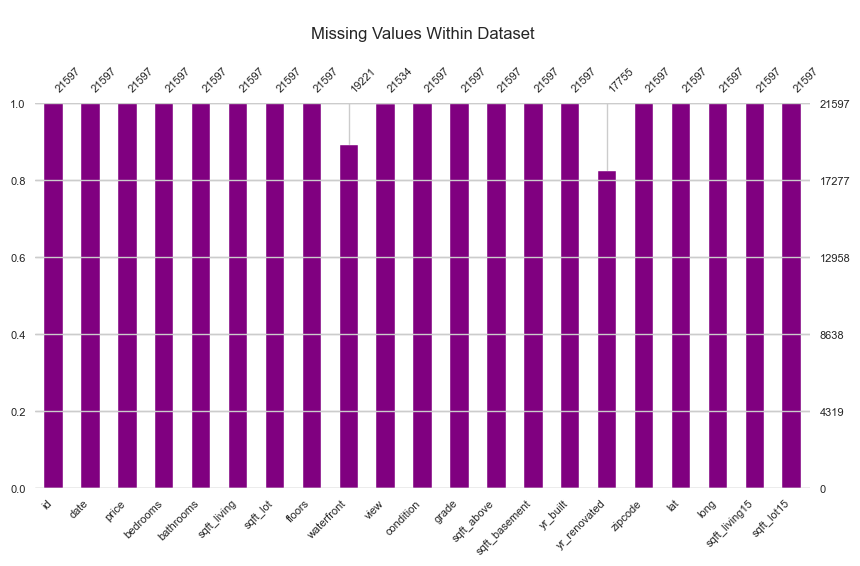

In [15]:
# Visualise the missing values in the dataset
msno.bar(data, color='purple', figsize=(10, 5), fontsize=8)
plt.title("""
Missing Values Within Dataset
""");

In [16]:
# percentage of missing data
house_df.isnull().sum()/len(house_df)*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [17]:
#Dropped all the missing values in our data because 11% and 17% are too big
house_df.dropna(inplace=True)

## Data Cleaning and Preparation

In [18]:
def clean_data(df):
    '''
    Clean data by removing missing values and duplicates
    '''
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    # Replace "?" and " " values with NaN
    df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan).replace('', np.nan)
    # Convert the column to float data type
    df['sqft_basement'] = df['sqft_basement'].astype(float)
    # Convert the 'date' column to a datetime data type
    df['date'] = pd.to_datetime(df['date'])
    #Converting the 'waterfront' column to a binary variable where 1 represents 'YES' a
    df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)
    # Remove missing values
    df.dropna(inplace=True)
    return df

In [19]:
clean_data(data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [20]:
#confirmation of the cleaned data
explore_data(data)

Number of rows: 17340
Number of columns: 21
Data types:
 id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17340 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17340 non-null  int64     

## Data Analysis
Converting the data types for sqft_basement and date columns to float and datetime
respectively.

In [22]:
# Replace "?" and " " values with NaN
house_df['sqft_basement'] = house_df['sqft_basement'].replace('?', np.nan).replace('', np.nan)
# Convert the column to float data type
house_df['sqft_basement'] = house_df['sqft_basement'].astype(float)
# Convert the 'date' column to a datetime data type
house_df['date'] = pd.to_datetime(house_df['date'])

In [23]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15762 non-null  int64         
 1   date           15762 non-null  datetime64[ns]
 2   price          15762 non-null  float64       
 3   bedrooms       15762 non-null  int64         
 4   bathrooms      15762 non-null  float64       
 5   sqft_living    15762 non-null  int64         
 6   sqft_lot       15762 non-null  int64         
 7   floors         15762 non-null  float64       
 8   waterfront     15762 non-null  object        
 9   view           15762 non-null  object        
 10  condition      15762 non-null  object        
 11  grade          15762 non-null  object        
 12  sqft_above     15762 non-null  int64         
 13  sqft_basement  15429 non-null  float64       
 14  yr_built       15762 non-null  int64         
 15  yr_renovated   1576

## Univariate Analysis
Visualizing categorical variables in the data

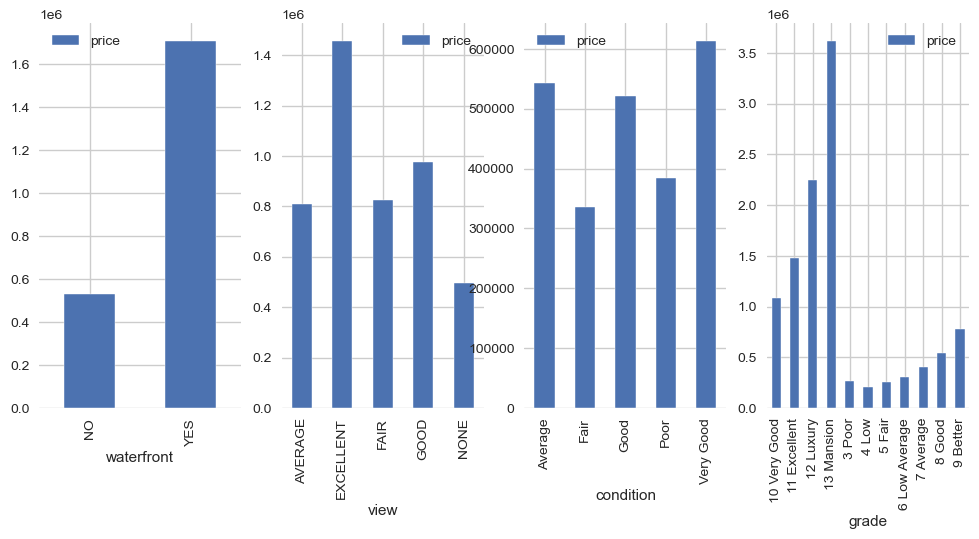

In [25]:
categorical_features = house_df.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))
for index, feature in enumerate(categorical_features):
    house_df.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

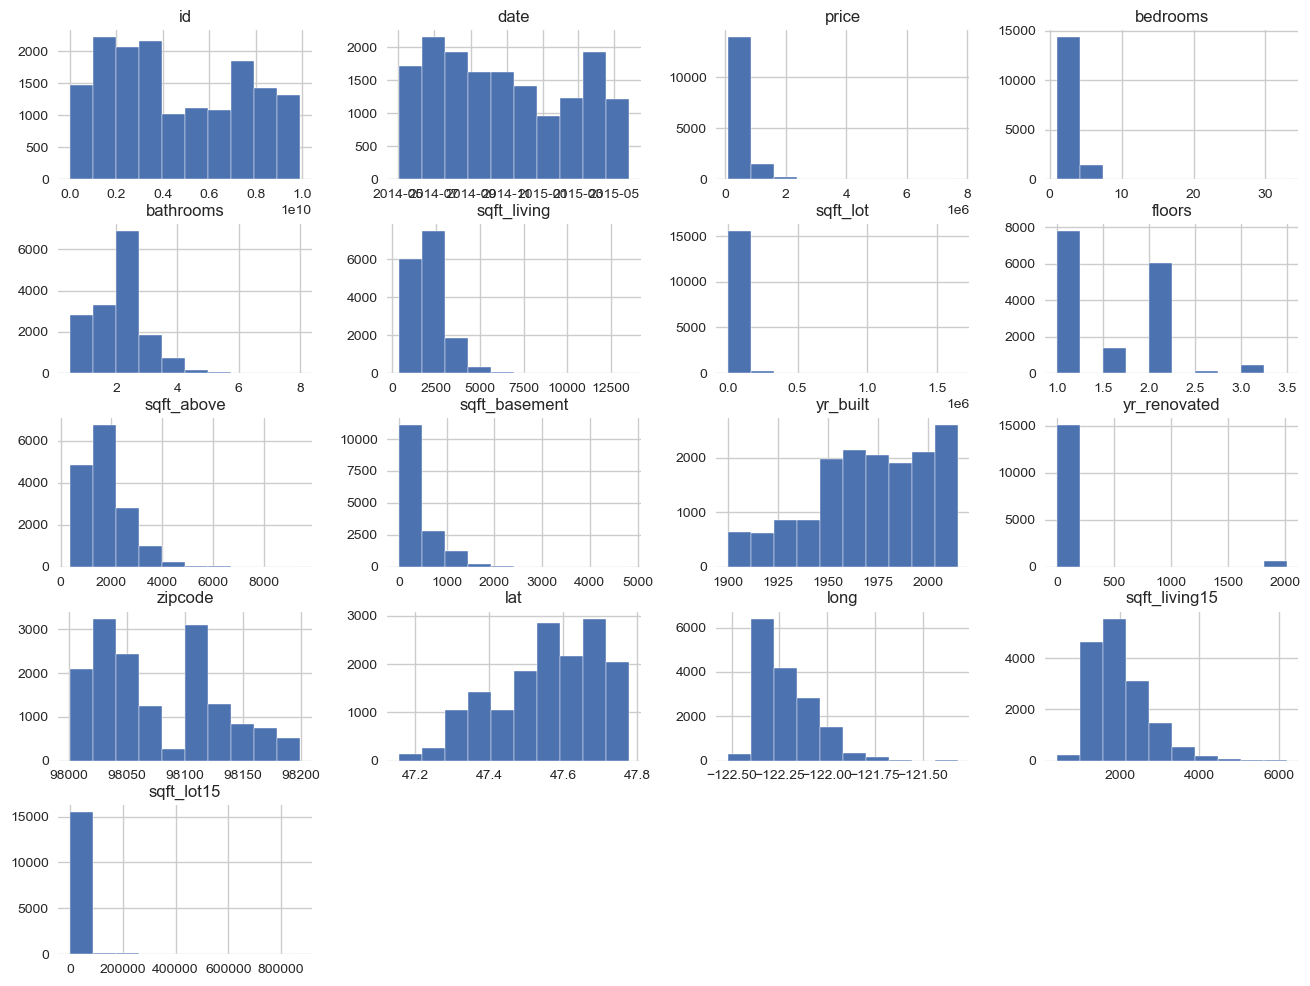

In [26]:
#Visualizing our numerical variables
house_df.hist(figsize=(16,12));

Visualizing the price column alone

In [29]:
# Function to plot the histogram, kde and boxplot of the data
def plot_distribution(df, col, title, bins_=10):
    ''' Plots the distribution of a column in a dataframe as a histogram, kde and boxplot'''
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1, 3)})
    # assign a graph to each ax
    sns.boxplot(df[col], ax=ax_box, color='lightgreen')
    sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='lightblue', bins=bins_,alpha=0.5)
    plt.suptitle(title)
    plt.tight_layout();

Visualise the data distribution

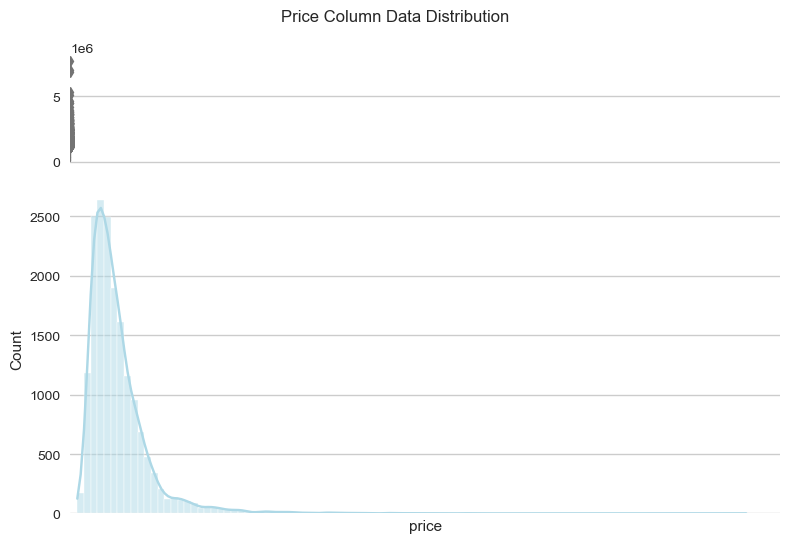

In [30]:
plot_distribution(data, 'price', 'Price Column Data Distribution', 100)

It is best to log transform this feature in order to normalize it, Since we will be using price as our target variable.

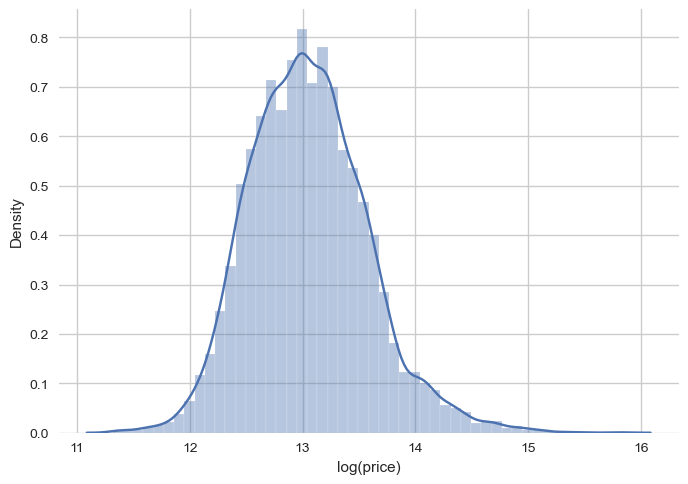

In [31]:
# calculating the log of price
house_df["log(price)"] = np.log(house_df["price"])
#Visualize the price using the logprice column after log transformation
sns.distplot(house_df['log(price)'], kde=True);

## Bivariate Analysis
Heatmap to show the correlation between different features in our data, in order to identify
variables that are strongly correlated with each other, and may therefore be important predictors of
a target variable. This can help in feature selection for predictive modeling tasks.

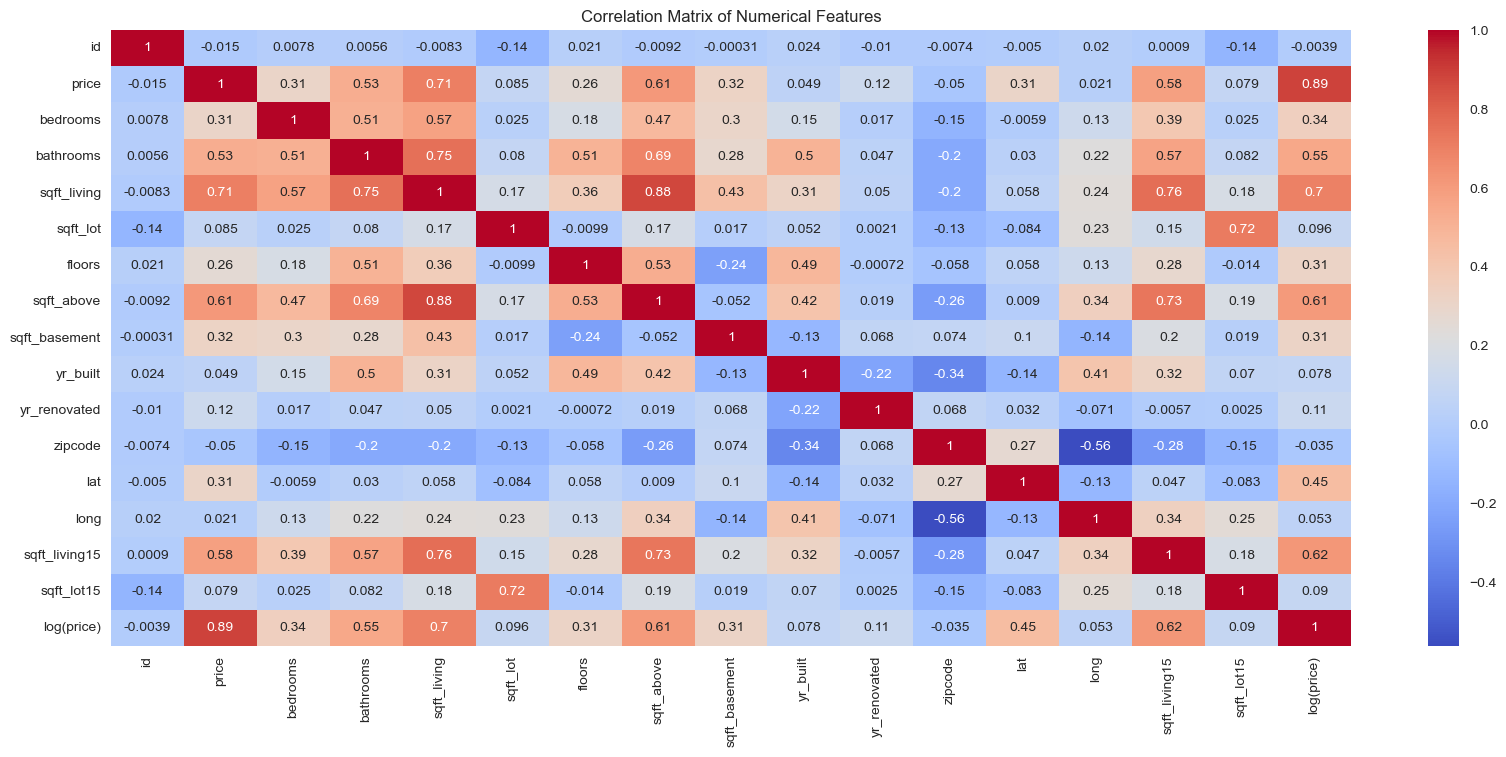

In [32]:
# Plot correlation matrix of numerical features
fig, ax = plt.subplots(figsize=(20,8))
corr = house_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# Display plot
plt.show()

## Objective 1. Identifying features influencing the pricing.
Top 5 features with the highest correlation with price

In [33]:
# Identify top 5 features that have the highest correlation with price
corr_matrix = data.corr()
top_5_features = corr_matrix['price'].abs().sort_values(ascending=False)[1:6]
print("Top 5 features that have the highest correlation with price:\n", top_5_features)

Top 5 features that have the highest correlation with price:
 sqft_living      0.703520
sqft_above       0.608209
sqft_living15    0.586046
bathrooms        0.524719
sqft_basement    0.321079
Name: price, dtype: float64


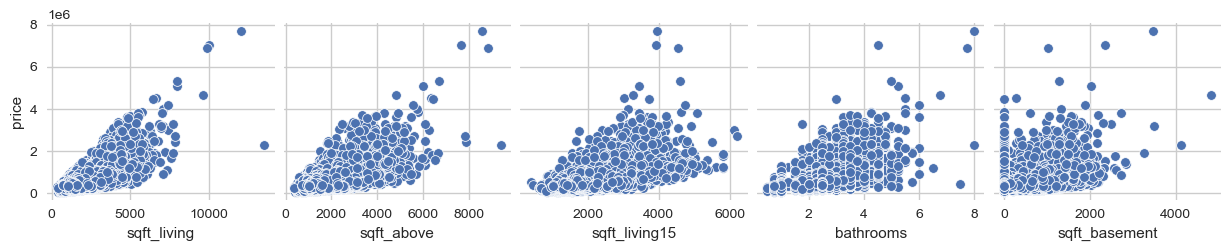

In [34]:
# Visualize the relationship between the top 5 features and price
sns.pairplot(data, x_vars=top_5_features.index, y_vars=['price'])

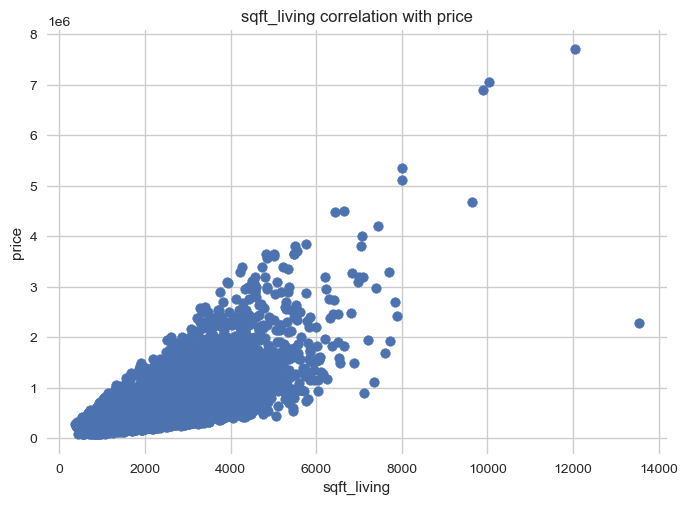

In [36]:
def plot_scatter(x, y, x_label, y_label, title):
    """
    Plots a scatter plot of x and y values with labeled axes and title.
    Args:
    x (list): A list of x values.
    y (list): A list of y values.
    x_label (str): The label for the x axis.
    y_label (str): The label for the y axis.
    title (str): The title for the plot.
    """
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

plot_scatter(data['sqft_living'], data['price'],'sqft_living', 'price','sqft_living correlation with price')

The above scatter plots shows a high correlation with the price

### Modelling

In [37]:
y = data['price']
X_baseline = data[['sqft_living']]
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.699e+04
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:15:22   Log-Likelihood:            -2.4093e+05
No. Observations:               17340   AIC:                         4.819e+05
Df Residuals:                   17338   BIC:                         4.819e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.825e+04   4936.020     -9.776      

1. The model is statistically significant overall, with an F-statistic p-value well below 0.05
2. The model explains about 49.5% of the variance in price
3. The model coefficients (const and sqft_living) are both statistically significant, with t-statistic pvalues
well below 0.05
4. The coefficient for sqft_living is 282.4658, which means that for every additional square foot of
living space, the price of the property increases by $282.5.
5. The intercept (const) of the model is -57900, which means that when the size of the living space
is zero, the estimated price is -$57,900. However, this value does not have a practical
interpretation since it is not possible for a house to have zero square feet of living space.
6. The Jarque-Bera test for normality shows that the errors are not normally distributed since the
p-value is less than 0.05. This suggests that there may be some non-linearity or
heteroscedasticity in the relationship between the independent variable and dependent
variable.


Overall, we can conclude that sqft_living is a significant predictor of price, but there may be other
factors that also affect the price of a property. Additionally, the model may not be the best fit for
the data due to the issues with normality and multicollinearity.

### Multiple linear regression

In [38]:
#Convert the 'condition' and 'grade' columns to ordinal variables
conditions = {'Poor': 1, 'Average': 2, 'Fair': 3, 'Good': 4, 'Very Good': 5, 'Excellent': 6}
data['condition'] = data['condition'].map(conditions)

In [39]:
grades = {'3 Poor': 1,'4 Low': 2,'5 Fair' : 3, '6 Low Average': 4, '7 Average': 5, '8 Good': 6, '9 Better': 7, '10 Very Good': 8,'11 Excellent': 9, '12 Luxury': 10, '13 Mansion': 11}
data['grade'] = data['grade'].map(grades)

In [41]:
# set the predictor variables
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
           'yr_renovated', 'grade', 'condition']]
# add a constant to the predictor variables
X = sm.add_constant(X)
# set the response variable
y = data['price']
# create the model
model = sm.OLS(y, X)
model_results = model.fit()
# print the model summary
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2863.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:44:50   Log-Likelihood:            -2.3787e+05
No. Observations:               17340   AIC:                         4.758e+05
Df Residuals:                   17328   BIC:                         4.759e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.867e+06   1.56e+05     44.039

According to the output, our multiple linear regression model has an R-squared value of 0.645,
indicating that approximately 64.5% of the variance in home prices can be explained by the
predictor variables included in the model.
The coefficients of the predictor variables indicate the impact of each variable on the home price.


1. Waterfront property: Homes located on the waterfront have an average increase of $758,200 in
value compared to homes that are not on the waterfront.
2. Square footage of living area: An increase in one square foot of living area leads to an increase
of $121.74 in home price.
3. Grade: Higher-grade properties have an average increase of $128,300 in value compared to
lower-grade properties.
4. Number of bathrooms: Each additional bathroom adds an average of $49,730 to the home
price
5. Bedrooms: Each additional bedroom adds an average of $42,130 to the home price
The p-values of the coefficients indicate the statistical significance of the impact of each variable on
the home price. All the predictor variables in our model have a p-value of 0.000, indicating that they
are statistically significant in predicting the home price.

### The metric of success

In [42]:
# Calculate the mean absolute error of the baseline model
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

173788.48506132633

In [43]:
#calculating the RMSE for the baseline model
rmse = np.sqrt(baseline_mae)
rmse

416.87946106917565

In [44]:
# calculating the MAE
multiple_linear_mae = mean_absolute_error(y, model_results.predict(sm.add_constant(X)))
multiple_linear_mae

142260.3484283118

In [45]:
#Calculating the RMSE
rmse = np.sqrt(multiple_linear_mae)
rmse

377.1741619309464

From the above findings, our multiple linear regression model is a better model since the RMSE value is lower than that of the baseline model

## Objective 2 : To analyse trends in house prices overtime (time series analysis) and predict future prices.

In [47]:
data_2 = house_df.copy()

# extracting month and year
data_2['month_sold'] = data_2['date'].dt.month
data_2['year_sold'] = data_2['date'].dt.year
data_2.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log(price),month_sold,year_sold
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,13.195614,12,2014
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,13.311329,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,13.142166,2,2015


In [48]:
# Retrieve the mean
data_monthly = data_2['month_sold'].mean()
data_monthly

6.5760690267732524

The average month the houses were sold was in June (6th month) as seen from the above output

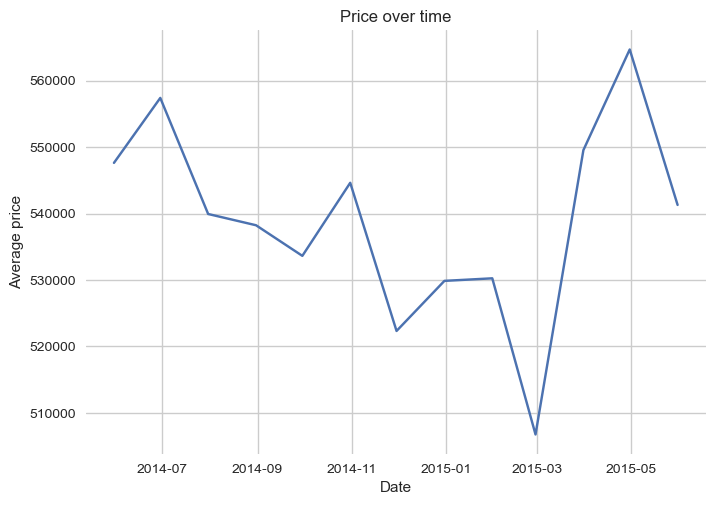

In [49]:
# assuming 'date' column is already converted to datetime format
# group data by date and calculate mean price
monthly_avg_price = data_2.groupby(pd.Grouper(key='date', freq='M'))['price'].mean()
# plot time series
plt.plot(monthly_avg_price.index, monthly_avg_price.values)
plt.xlabel('Date')
plt.ylabel('Average price')
plt.title('Price over time')
plt.show()

In [57]:
# Convert 'yr_renovated' to datetime format and extract year
data_2['yr_renovated'] = pd.to_datetime(data_2['yr_renovated'], format='%Y', errors='coerce')

In [58]:
data_2['yr_renovated'] = data_2['yr_renovated'].dt.year

In [59]:
# filling NaN values with 0 and converted it to integer data type.
data_2['yr_renovated'] = data_2['yr_renovated'].astype('Int64').fillna(0)
data_2['yr_renovated']

1        1991
3           0
4           0
5           0
6           0
         ... 
21591       0
21592       0
21593       0
21594       0
21596       0
Name: yr_renovated, Length: 15762, dtype: Int64

In [60]:
# One hot encoding for the column 'yr_renovated'
data_2['renovated'] = (data_2['yr_renovated'] > 0).astype(int)
data_2['renovated'].value_counts()

0    15111
1      651
Name: renovated, dtype: int64

We notice that there are 651 houses that have been renovated and 15,111 houses that have not
been renovated.

In [61]:
#creating a new column - age of the house- which will be given by the latest year minus
#latest year
yr_built_max = data_2['yr_built'].max()
print(yr_built_max)
#age column
data_2['Age'] = yr_built_max - data_2['yr_built']
data_2.columns

2015


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log(price)',
       'month_sold', 'year_sold', 'renovated', 'Age'],
      dtype='object')

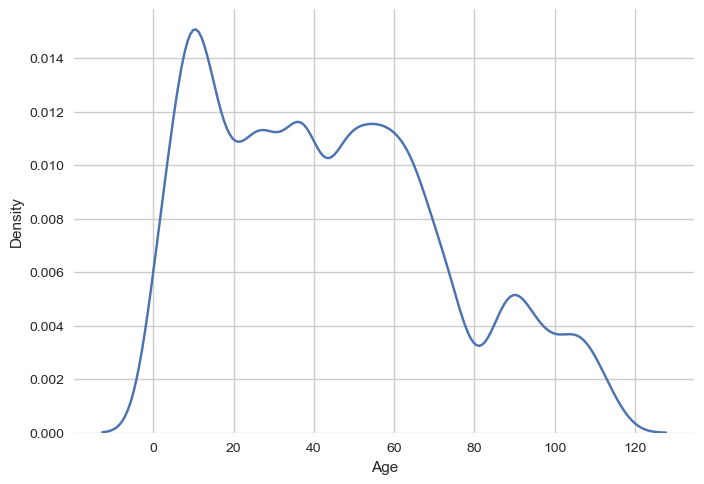

In [62]:
# Explore the Age column created
sns.kdeplot(data_2['Age']);

Above is a density plot for Age column

In [64]:
#The below correlation matrix shows some of the features as well as including the newly created column, age.
data_2[['price','bedrooms','sqft_living','condition','grade', 'yr_built','yr_renovated','sqft_lot',
         'floors', 'waterfront', 'sqft_above', 'sqft_basement','Age']].corr()

,price,bedrooms,sqft_living,yr_built,yr_renovated,sqft_lot,floors,sqft_above,sqft_basement,Age
price,1.000000,0.305489,0.706189,0.049345,0.122731,0.084504,0.259505,0.612014,0.320053,-0.049345
bedrooms,0.305489,1.000000,0.573575,0.153229,0.017430,0.025460,0.180485,0.474272,0.301747,-0.153229
sqft_living,0.706189,0.573575,1.000000,0.314220,0.050232,0.165336,0.359407,0.876176,0.434918,-0.314220
yr_built,0.049345,0.153229,0.314220,1.000000,-0.223541,0.051578,0.487052,0.418850,-0.130957,-1.000000
yr_renovated,0.122731,0.017430,0.050232,-0.223541,1.000000,0.002147,-0.000720,0.018888,0.067813,0.223541
sqft_lot,0.084504,0.025460,0.165336,0.051578,0.002147,1.000000,-0.009924,0.174216,0.016843,-0.051578
floors,0.259505,0.180485,0.359407,0.487052,-0.000720,-0.009924,1.000000,0.529101,-0.242148,-0.487052
sqft_above,0.612014,0.474272,0.876176,0.418850,0.018888,0.174216,0.529101,1.000000,-0.052388,-0.418850
sqft_basement,0.320053,0.301747,0.434918,-0.130957,0.067813,0.016843,-0.242148,-0.052388,1.000000,0.130957
Age,-0.049345,-0.153229,-0.314220,-1.000000,0.223541,-0.051578,-0.487052,-0.418850,0.130957,1.000000


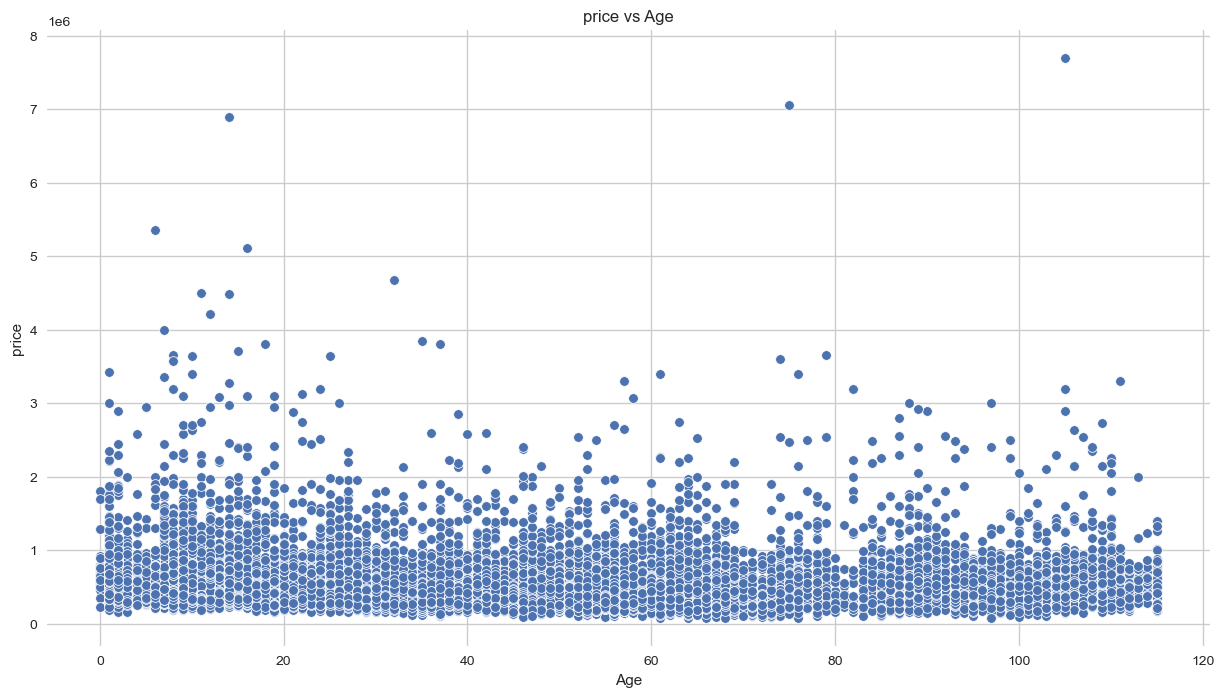

In [65]:
# Visualization on Age v Price on a scatter plot
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data_2, x='Age', y='price')
plt.title('price vs Age');

A linear regression model for Age and price

In [66]:
X = data_2[['Age']]
y = data_2['price']
# Add constant to X
X = sm.add_constant(X)
# Create and fit OLS model
model = sm.OLS(y, X).fit()
print(model.params)
print()
print(model.pvalues)

const    568795.600304
Age        -626.092195
dtype: float64

const    0.000000e+00
Age      5.703425e-10
dtype: float64


Based on this simple regression model, we can note that there is a statistically negative significant
relationship between the age of the property and the price at which it was sold.
The coefficient of  -626.092195 indicates that, a one year increase would be associated with a
$626.09 decrease in the sale price, on average.
Overall, the results suggest that the age of a property may be a significant predictor of its price,
however there are other variables that would need further exploration in order to understand
better the determinants of house prices.

In [67]:
# Predicts the values using the model
y_pred = model.predict(X)
# Calculate the mean absolute error
mae = np.mean(np.abs(y - y_pred))
print('MAE:', mae)
mse = np.mean((y - y_pred)** 2)
rmse = np.sqrt(mse)
print('RMSE', rmse)

MAE: 234721.94876067538
RMSE 371760.59372150264


Here we have a higher RMSE compared to the MAE in this model, we will still remain with it as
the metric of evaluation as based on the conclusion, it may be attributed to other factors.

### Multiple Linear Regression

In [69]:
from statsmodels.formula.api import ols
features = ['bedrooms','sqft_living','condition', 'yr_built', 'Age', 'year_sold', 'month_sold', 'price']
formula = 'price ~ sqft_living + bedrooms + Age + condition'
model_2 = ols(formula = formula, data = data_2[features]).fit()
print('R_squared:', model_2.rsquared)
print()
print('F_Statistic:', model_2.fvalue)
print()
print(model_2.params)
print()
print(model_2.pvalues)

R_squared: 0.5493984181963636

F_Statistic: 2744.021399005872

Intercept                -76684.708715
condition[T.Fair]        -70198.774025
condition[T.Good]         -6597.693663
condition[T.Poor]        -39795.351992
condition[T.Very Good]    40213.720215
sqft_living                 346.692388
bedrooms                 -62773.970748
Age                        2428.664229
dtype: float64

Intercept                  1.777015e-18
condition[T.Fair]          1.504801e-03
condition[T.Good]          1.759438e-01
condition[T.Poor]          4.890063e-01
condition[T.Very Good]     3.647666e-07
sqft_living                0.000000e+00
bedrooms                  4.781444e-126
Age                       3.190623e-206
dtype: float64


This multiple linear regression model purpose was to predict house prices based on several independent variables.
1. The R-Squared value 0.549 suggests that the model can explain for 54.93% of the variance inhouse prices, this may be interpreted as a moderate fit.
2. Under the intercept coefficient of -7.668e+04 means that, on average, the coefficients of thedifferent conditions show that, a house that is in very good condition can be sold for 70,200 less!
3. The coefficient for sqft_living of 346.6924 goes to imply that, on average, the price of a houseincreases by 62,770.
4. The coefficient for age suggests that, on average, the price of a house increases by $2,428.66 for each additional year of age.
5. The model has a significant F-statistic of 2744.021 and a low p-value, indicating that the model isstatistically significant.

## Objective 3 :To identify extreme prices (outlierdetection) and recommend better pricing strategy.

In this section, we analyse the outliers in price category. We identify the houses with extremely highand low prices, and try to find out the reason for it. We also suggest a better pricing strategy.

In [70]:
data_3 = house_df.copy()

In [73]:
# Identifying outliers in the price column of our dataset.
count = 0
price_outliers = []
# Calculate the z-score for each data point
z_scores = (data_3['price'] - data_3['price'].mean()) / data_3['price'].std()
# Create a new empty DataFrame to store the outliers
data_outliers = pd.DataFrame(columns=data_3.columns)
for idx, row in data_3['price'].T.iteritems():
    if abs(z_scores[idx]) > 3:
        count += 1
        # Append the outlier row to the data_outliers DataFrame
        data_outliers = data_outliers.append(data_3.loc[idx])
        # Add the index of the outlier row to the price_outliers list (if needed)
        price_outliers.append(idx)
        
# Print the count of outliers found
print(f"{count} outliers found")

282 outliers found


The code above checks if there is any extreme prices for the houses. It then adds them to the new
list of extreme prices and shows how many it found.

In [74]:
data_outliers.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log(price)
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,NO,EXCELLENT,...,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336,14.508658
153,7855801670,2015-04-01,2250000.0,4,3.25,5180,19850,2.0,NO,GOOD,...,3540,1640.0,2006,0.0,98006,47.5620,-122.162,3160,9750,14.626441
246,2025069065,2014-09-29,2400000.0,4,2.50,3650,8354,1.0,YES,EXCELLENT,...,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841,14.690979
282,7424700045,2015-05-13,2050000.0,5,3.00,3830,8480,2.0,NO,FAIR,...,2630,1200.0,1905,1994.0,98122,47.6166,-122.287,3050,7556,14.533350
300,3225069065,2014-06-24,3080000.0,4,5.00,4550,18641,1.0,YES,EXCELLENT,...,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508,14.940440


In [75]:
data_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 21 to 21560
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             282 non-null    object        
 1   date           282 non-null    datetime64[ns]
 2   price          282 non-null    float64       
 3   bedrooms       282 non-null    object        
 4   bathrooms      282 non-null    float64       
 5   sqft_living    282 non-null    object        
 6   sqft_lot       282 non-null    object        
 7   floors         282 non-null    float64       
 8   waterfront     282 non-null    object        
 9   view           282 non-null    object        
 10  condition      282 non-null    object        
 11  grade          282 non-null    object        
 12  sqft_above     282 non-null    object        
 13  sqft_basement  279 non-null    float64       
 14  yr_built       282 non-null    object        
 15  yr_renovated   282 n

In [77]:
# Convert the column to float data type
cols_to_convert = ['bedrooms','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']
data_outliers[cols_to_convert] = data_outliers[cols_to_convert].astype(float)

In [78]:
data_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 21 to 21560
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             282 non-null    object        
 1   date           282 non-null    datetime64[ns]
 2   price          282 non-null    float64       
 3   bedrooms       282 non-null    float64       
 4   bathrooms      282 non-null    float64       
 5   sqft_living    282 non-null    float64       
 6   sqft_lot       282 non-null    float64       
 7   floors         282 non-null    float64       
 8   waterfront     282 non-null    object        
 9   view           282 non-null    object        
 10  condition      282 non-null    object        
 11  grade          282 non-null    object        
 12  sqft_above     282 non-null    float64       
 13  sqft_basement  279 non-null    float64       
 14  yr_built       282 non-null    object        
 15  yr_renovated   282 n

In [80]:
# calculating the age of the houses in the price outliers
data_outliers['house_age'] = np.where(data_outliers['yr_built']==0, 0, 2015 - data_outliers['yr_built'])
# the number of houses older than 50 years in our outliers
house_age_gt_50 = list(data_outliers[data_outliers['house_age']>50]['house_age'])
len(house_age_gt_50)

103

Creating a linear regression model

In [81]:
y = data_outliers['price']
X_baseline = data_outliers[['sqft_living']]
baseline_model_outliers = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results_outliers = baseline_model_outliers.fit()

In [86]:
baseline_model_outliers_mae = mean_absolute_error(y, baseline_results_outliers.predict(sm.add_constant(X_baseline)))
baseline_model_outliers_mae


462016.19546747336

In [87]:
rmse = np.sqrt(baseline_model_outliers_mae)
rmse

679.7177322002666

Creating a multiple linear regression model using additional variables

In [88]:
# set the predictor variables
X = data_outliers[['bedrooms','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15','sqft_lot15']]
# add a constant to the predictor variables
X = sm.add_constant(X)
# set the response variable
y = data_outliers['price']
# create the model
model_outliers = sm.OLS(y, X)
model_outliers_results = model_outliers.fit()

In [90]:
model_outliers_mae = mean_absolute_error(y, model_outliers_results.predict(sm.add_constant(X)))
model_outliers_mae

457477.0422929642

In [91]:
rmse = np.sqrt(model_outliers_mae)
rmse

676.3704918851532

Creating a function that predicts house prices using the multiple linear regression formula. The
function takes in different variables that influence the price

In [95]:
# function that predicts the house prices
def predict_house_price(bedrooms,sqft_living, sqft_lot, sqft_above, sqft_living15, sqft_lot15):
    # set the coefficients and intercept values
    b0 = 8.412e+05
    b1 = -8.721e+04
    b2 = 371.8604
    b3 = -1.3714
    b4 = 0.9192
    b5 = 48.3490
    b6 = -0.8813
    # calculate the predicted house price
    house_price = b0 + (b1 * bedrooms) + (b2 * sqft_living) + (b3 * sqft_lot) + (b4 * sqft_above) + (b5 * sqft_living15) + (b6 * sqft_lot15)
    return house_price

let's use the predict_house_function to predict house price for a house with 4bedrooms,
1000sqft_living, 1100sqft_lot, 1200sqft_above, 1300sqft_living15, and 1400sqft_lot15

In [96]:
predict_house_price(4,1000, 1100, 1200, 1300, 1400)

925434.78

We create a function that gives suggestions of the houses in our dataset, based on budget price
range.

In [113]:
def suggest_houses(price_range):
    # Filter by price range
    data_filtered = data[(data['price'] >= price_range[0]) & (data['price'] <= price_range[1])]
    # Sort by price ascending
    data_sorted = data_filtered.sort_values(by='price')
    # Select top 5 suggestions
    data_suggestions = data_sorted.head(10)
    # Return the specifications of the suggested houses
    return data_suggestions[['bedrooms', 'sqft_living', 'floors', 'zipcode']]

In [114]:
suggest_houses((78000, 100000))

,bedrooms,sqft_living,floors,zipcode
465,1,430,1.0,98014
16184,2,730,1.0,98168
8267,3,860,1.0,98146
2139,2,520,1.0,98168
18453,2,900,1.0,98168
3763,2,700,1.0,98168
16700,2,910,1.0,98032
10242,2,830,1.0,98032
13743,3,840,1.0,98023
5860,3,900,1.0,98023


## Conclusion
1. Some of the features that influence the pricing of houses include:

    a. Square footage of living space in the home: an additional square footage increases the
       price by $199.09

    b. Waterfront: the presence of a waterfront has an associated increase in price of $70,000

    c. Condition of the house: houses in good conditions have an associated increase in price of
       $35,650 compared to houses with average condition.

    d. For every additional year in the age of a house, there is an associated decrease in price of$626.09

    e. Some of the overvalued properties were found to be older than 50 years of age
    
    f. The square footage of interior housing living space for the nearest 15 neighbors influences the pricing of houses, in that, an additional square  footage leads to an increase in price by $48.35   

## Recommendations
I recommend that:

1. There is a need to do further exploration into other features in order to better understand the determinants of house prices.

2. The agency should consider re-purposing the old houses and targeting business owners rather than homeowners, this may also be achieved by market research.

3. The agency should consider investing in properties that can increase their profitability, such as properties that have a waterfront.